In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

RND_SEED = 42

In [143]:
# Function to generate anisotropic ovoid clusters with different densities
def generate_ovoid_clusters(centers, cluster_std, num_samples):
    data = []
    label = []
    for i, center in enumerate(centers):
        X, y = make_blobs(n_samples=num_samples[i], centers=[center], cluster_std=cluster_std[i], random_state=RND_SEED)
        # print(f"avg cluster label: {np.mean(y)}")
        # Apply transformation to create ovoid shapes
        transformation_matrix = np.array([[1.5, 0.2], [0.2, 0.8]])
        X = X @ transformation_matrix
        data.append(X)
        label.append([i] * num_samples[i])
    return np.vstack(data), (np.vstack(label)).flatten()



In [136]:
# Plot pointcloud
def plot_pointcloud(X, labels, title, axis=None):
    if axis is not None:
        axis.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=5, alpha=0.7)
        axis.set_title(title)
    else:
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=5, alpha=0.7)
        plt.title(title)

In [206]:

# Function to apply DBSCAN and visualize results
def apply_dbscan(eps_values, X, y):
    fig, axes = plt.subplots(1, len(eps_values+1), figsize=(15, 5))

    plot_pointcloud(X, y, f"Raw Pointcloud", axis=axes[0])
    for i, eps in enumerate(eps_values):
        dbscan = DBSCAN(eps=eps, min_samples=10)
        labels = dbscan.fit_predict(X)

        # Plot results
        plot_pointcloud(X, labels, f"DBSCAN Clustering (eps={eps})", axis=axes[i])
        # axes[i].scatter(X[:, 0], X[:, 1], c=labels, cmap="rainbow", s=5)
        # axes[i].set_title(f"DBSCAN Clustering (eps={eps})")

    plt.show()


In [172]:
np.random.seed(RND_SEED)

centers = [(-.5, 0.5), (1.3, .9), (-3, -5), (3, -7), (3, 3)]
cluster_std = [0.5, 1.3, 0.8, 2.0, 0.3]  # Different standard deviations
num_samples = [100, 100, 100, 100, 100]  # Different densities

# Generate synthetic data
X, y = generate_ovoid_clusters(centers, cluster_std, num_samples)
# print(X.shape, y.shape)
# np.histogram(y, bins=50)

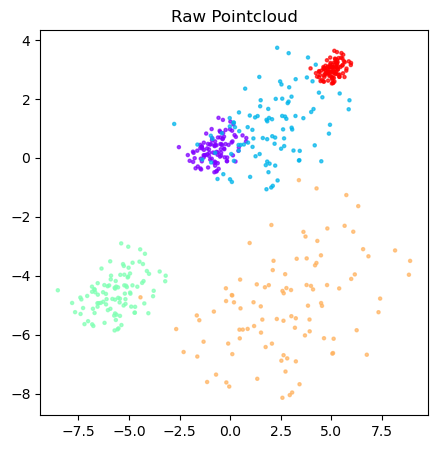

In [173]:
# Plot raw pointcloud (optional)
y=y.flatten()
plt.figure(figsize=(5, 5))
plot_pointcloud(X, y, f"Raw Pointcloud")
plt.show()

In [ ]:
# Experiment with different eps values
eps_values = [0.2, .4, .8, 1.2]
apply_dbscan(eps_values, X, y.flatten)


TypeError: can only concatenate list (not "int") to list